# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [85]:
!pip install yfinance==0.2.54


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import os
import IPython

IPython.display.clear_output()
os._exit(00)

In [5]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

In [6]:
# Download front-month futures data
symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F']

# symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F', 'SPY','VOO','DIA','QQQ','IWM','EEM', 'VWO','FEZ','DAX','EWJ','URTH']
# symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F', 'SPY','VOO','DIA','QQQ','IWM','EEM', 'VWO']

df = yf.download(symbols)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


In [7]:
# Download front-month futures data
symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F']

dfs = []

# Loop through each symbol and download the data
for symbol in symbols:
    df = yf.download(symbol)  # Download the data
    dfs.append(df)  # Append DataFrame to the list

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
len(dfs)

4

In [9]:
# Print shape and first 2 rows for each DataFrame
for i, df in enumerate(dfs):
    print(f"DataFrame {i} ({symbols[i]}) - Shape: {df.shape}")
    print(df.head(2))  # Print first 2 rows
    print("-" * 50)  # Separator for readability


DataFrame 0 (ES=F) - Shape: (6175, 5)
Price        Close     High      Low     Open  Volume
Ticker        ES=F     ES=F     ES=F     ES=F    ES=F
Date                                                 
2000-09-18  1467.5  1489.75  1462.25  1485.25  104794
2000-09-19  1478.5  1482.75  1466.75  1467.00  103371
--------------------------------------------------
DataFrame 1 (ZN=F) - Shape: (6137, 5)
Price           Close       High        Low       Open Volume
Ticker           ZN=F       ZN=F       ZN=F       ZN=F   ZN=F
Date                                                         
2000-09-21  99.953133  99.953133  99.625000  99.656250  41462
2000-09-22  99.828133  99.875000  99.828133  99.859383  35044
--------------------------------------------------
DataFrame 2 (GC=F) - Shape: (6147, 5)
Price            Close        High         Low        Open Volume
Ticker            GC=F        GC=F        GC=F        GC=F   GC=F
Date                                                             
2000-0

In [10]:
df.isna().sum().sum()

0

In [11]:
# Check for NaN values in each DataFrame
for i, df in enumerate(dfs):
    has_nans = df.isnull().any().any()  # Returns True if any NaN is present
    print(f"DataFrame {i} ({symbols[i]}) - Shape: {df.shape}")
    print(f"Contains NaN values: {has_nans}")
    print(df.head(2))  # Show first 2 rows
    print("-" * 50)  # Separator for readability


DataFrame 0 (ES=F) - Shape: (6175, 5)
Contains NaN values: False
Price        Close     High      Low     Open  Volume
Ticker        ES=F     ES=F     ES=F     ES=F    ES=F
Date                                                 
2000-09-18  1467.5  1489.75  1462.25  1485.25  104794
2000-09-19  1478.5  1482.75  1466.75  1467.00  103371
--------------------------------------------------
DataFrame 1 (ZN=F) - Shape: (6137, 5)
Contains NaN values: False
Price           Close       High        Low       Open Volume
Ticker           ZN=F       ZN=F       ZN=F       ZN=F   ZN=F
Date                                                         
2000-09-21  99.953133  99.953133  99.625000  99.656250  41462
2000-09-22  99.828133  99.875000  99.828133  99.859383  35044
--------------------------------------------------
DataFrame 2 (GC=F) - Shape: (6147, 5)
Contains NaN values: False
Price            Close        High         Low        Open Volume
Ticker            GC=F        GC=F        GC=F        GC=

In [12]:
# Count NaN values in each DataFrame
nan_counts = [df.isna().sum().sum() for df in dfs]

# Print the number of NaN values for each DataFrame
for i, count in enumerate(nan_counts):
    print(f"DataFrame {i+1}: {count} NaN values")


DataFrame 1: 0 NaN values
DataFrame 2: 0 NaN values
DataFrame 3: 0 NaN values
DataFrame 4: 0 NaN values


In [13]:
df = yf.download(symbols)

[*********************100%***********************]  4 of 4 completed


In [14]:
df.head()

Price            Close                       High                        Low  \
Ticker            DX=F ES=F GC=F ZN=F        DX=F ES=F GC=F ZN=F        DX=F   
Date                                                                           
2000-06-22  107.400002  NaN  NaN  NaN  107.639999  NaN  NaN  NaN  106.900002   
2000-06-23  107.720001  NaN  NaN  NaN  107.879997  NaN  NaN  NaN  107.070000   
2000-06-26  107.769997  NaN  NaN  NaN  108.260002  NaN  NaN  NaN  107.599998   
2000-06-27  106.980003  NaN  NaN  NaN  107.849998  NaN  NaN  NaN  106.970001   
2000-06-28  107.250000  NaN  NaN  NaN  107.599998  NaN  NaN  NaN  107.029999   

Price                            Open                Volume                 
Ticker     ES=F GC=F ZN=F        DX=F ES=F GC=F ZN=F   DX=F ES=F GC=F ZN=F  
Date                                                                        
2000-06-22  NaN  NaN  NaN  107.099998  NaN  NaN  NaN  666.0  NaN  NaN  NaN  
2000-06-23  NaN  NaN  NaN  107.430000  NaN  NaN  NaN  258.0  NaN  NaN  NaN  
2000-06-26  NaN  NaN  NaN  107.680000  NaN  NaN  NaN  266.0  NaN  NaN  NaN  
2000-06-27  NaN  NaN  NaN  107.849998  NaN  NaN  NaN  669.0  NaN  NaN  NaN  
2000-06-28  NaN  NaN  NaN  107.059998  NaN  NaN  NaN  258.0  NaN  NaN  NaN

In [15]:
df.shape

(6249, 20)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6249 entries, 2000-06-22 to 2025-02-28
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, DX=F)   6235 non-null   float64
 1   (Close, ES=F)   6175 non-null   float64
 2   (Close, GC=F)   6147 non-null   float64
 3   (Close, ZN=F)   6137 non-null   float64
 4   (High, DX=F)    6235 non-null   float64
 5   (High, ES=F)    6175 non-null   float64
 6   (High, GC=F)    6147 non-null   float64
 7   (High, ZN=F)    6137 non-null   float64
 8   (Low, DX=F)     6235 non-null   float64
 9   (Low, ES=F)     6175 non-null   float64
 10  (Low, GC=F)     6147 non-null   float64
 11  (Low, ZN=F)     6137 non-null   float64
 12  (Open, DX=F)    6235 non-null   float64
 13  (Open, ES=F)    6175 non-null   float64
 14  (Open, GC=F)    6147 non-null   float64
 15  (Open, ZN=F)    6137 non-null   float64
 16  (Volume, DX=F)  6235 non-null   float64
 17  (Volume, ES=F) 

In [17]:
df.tail()

Price            Close                                          High           \
Ticker            DX=F     ES=F         GC=F        ZN=F        DX=F     ES=F   
Date                                                                            
2025-02-24  106.509003  6000.75  2947.899902  109.875000  106.665001  6067.50   
2025-02-25  106.227997  5970.00  2904.500000  110.515625  106.769997  6016.00   
2025-02-26  106.329002  5970.75  2916.800049  110.843750  106.574997  6023.75   
2025-02-27  107.176003  5876.25  2883.199951  110.609375  107.235001  6014.50   
2025-02-28  107.557999  5963.25  2836.800049  111.062500  107.595001  5971.00   

Price                                       Low                       \
Ticker             GC=F        ZN=F        DX=F    ES=F         GC=F   
Date                                                                   
2025-02-24  2957.899902  109.906250  106.035004  5994.5  2933.100098   
2025-02-25  2943.199951  110.625000  106.099998  5924.0  2890.000000   
2025-02-26  2917.000000  110.875000  106.070000  5945.5  2913.000000   
2025-02-27  2922.800049  110.859375  106.349998  5873.0  2870.399902   
2025-02-28  2877.100098  111.250000  107.120003  5848.0  2834.100098   

Price                         Open                                     Volume  \
Ticker            ZN=F        DX=F     ES=F         GC=F        ZN=F     DX=F   
Date                                                                            
2025-02-24  109.421875  106.459999  6040.75  2933.100098  109.546875  14927.0   
2025-02-25  109.812500  106.669998  6006.50  2938.699951  109.812500  19223.0   
2025-02-26  110.250000  106.114998  5982.00  2913.500000  110.515625  18555.0   
2025-02-27  110.421875  106.504997  5980.00  2918.500000  110.765625  18466.0   
2025-02-28  110.703125  107.135002  5883.00  2877.100098  110.765625  18466.0   

Price                                     
Ticker           ES=F    GC=F       ZN=F  
Date                                      
2025-02-24  1797847.0   415.0  4588117.0  
2025-02-25  2215332.0  1854.0  5598071.0  
2025-02-26  1901306.0  2050.0  2201257.0  
2025-02-27  2579895.0  3215.0   456329.0  
2025-02-28  2579895.0  3215.0   456329.0

### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [18]:
# Resample to monthly frequency, aggregating with the 'mean' (you can change this to 'sum', 'median', etc.)
monthly_df = df.resample('M').mean()

# Show the resampled data
monthly_df.head()


Price            Close                                             High  \
Ticker            DX=F         ES=F        GC=F        ZN=F        DX=F   
Date                                                                      
2000-06-30  107.180000          NaN         NaN         NaN  107.611428   
2000-07-31  108.050000          NaN         NaN         NaN  108.360500   
2000-08-31  111.046957          NaN  276.099991         NaN  111.369131   
2000-09-30  114.136191  1463.425000  273.389996  100.064739  114.610952   
2000-10-31  115.898181  1403.818182  269.809090  100.848732  116.241364   

Price                                                   Low               \
Ticker             ES=F        GC=F        ZN=F        DX=F         ES=F   
Date                                                                       
2000-06-30          NaN         NaN         NaN  106.851428          NaN   
2000-07-31          NaN         NaN         NaN  107.657500          NaN   
2000-08-31          NaN  276.099991         NaN  110.650000          NaN   
2000-09-30  1475.300000  273.534996  100.093755  113.542858  1450.675000   
2000-10-31  1419.784091  270.436365  101.066055  115.320454  1386.568182   

Price                                     Open                           \
Ticker            GC=F        ZN=F        DX=F         ES=F        GC=F   
Date                                                                      
2000-06-30         NaN         NaN  107.275714          NaN         NaN   
2000-07-31         NaN         NaN  107.918000          NaN         NaN   
2000-08-31  274.349991         NaN  110.902608          NaN  274.349991   
2000-09-30  273.284996   99.988849  114.077143  1465.125000  273.534996   
2000-10-31  269.545453  100.688928  115.716364  1404.806818  269.995454   

Price                       Volume                                          
Ticker            ZN=F        DX=F          ES=F        GC=F          ZN=F  
Date                                                                        
2000-06-30         NaN  443.571429           NaN         NaN           NaN  
2000-07-31         NaN  657.550000           NaN         NaN           NaN  
2000-08-31         NaN  652.913043           NaN    0.000000           NaN  
2000-09-30  100.020090  730.000000  96362.300000  214.550000  37961.714286  
2000-10-31  100.840918  660.409091  95870.863636   14.590909  45238.409091

In [19]:
monthly_df.shape

(297, 20)

In [20]:
monthly_df.isna().sum()

Price   Ticker
Close   DX=F      0
        ES=F      3
        GC=F      2
        ZN=F      3
High    DX=F      0
        ES=F      3
        GC=F      2
        ZN=F      3
Low     DX=F      0
        ES=F      3
        GC=F      2
        ZN=F      3
Open    DX=F      0
        ES=F      3
        GC=F      2
        ZN=F      3
Volume  DX=F      0
        ES=F      3
        GC=F      2
        ZN=F      3
dtype: int64

### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


### 1. Subset Adjusted Close Prices

In [21]:
# Subset Adjusted Close Prices
prices_df = monthly_df[["Close"]]

In [22]:
prices_df.shape

(297, 4)

### 2. Fill Missing Values

In [23]:
prices = prices_df.copy()
prices.fillna(0, inplace=True)  # Replace NaNs with 0 in the copy

In [24]:
prices.shape

(297, 4)

In [25]:
prices.head()

Price            Close                                     
Ticker            DX=F         ES=F        GC=F        ZN=F
Date                                                       
2000-06-30  107.180000     0.000000    0.000000    0.000000
2000-07-31  108.050000     0.000000    0.000000    0.000000
2000-08-31  111.046957     0.000000  276.099991    0.000000
2000-09-30  114.136191  1463.425000  273.389996  100.064739
2000-10-31  115.898181  1403.818182  269.809090  100.848732

### 3. Drop Rows with Remaining NaNs

In [26]:
prices.isna().sum()

Price  Ticker
Close  DX=F      0
       ES=F      0
       GC=F      0
       ZN=F      0
dtype: int64

### 4. Ensure Correct Date Formatting

In [27]:
# # Ensure Correct Date Formatting
prices.index 

DatetimeIndex(['2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30',
               '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31',
               '2001-02-28', '2001-03-31',
               ...
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31',
               '2025-01-31', '2025-02-28'],
              dtype='datetime64[ns]', name='Date', length=297, freq='M')

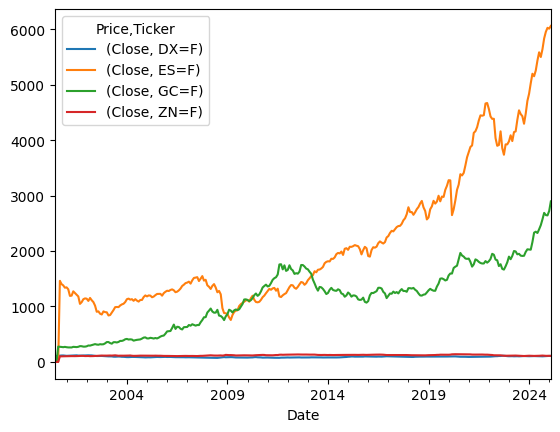

In [28]:
prices.plot()
plt.show()

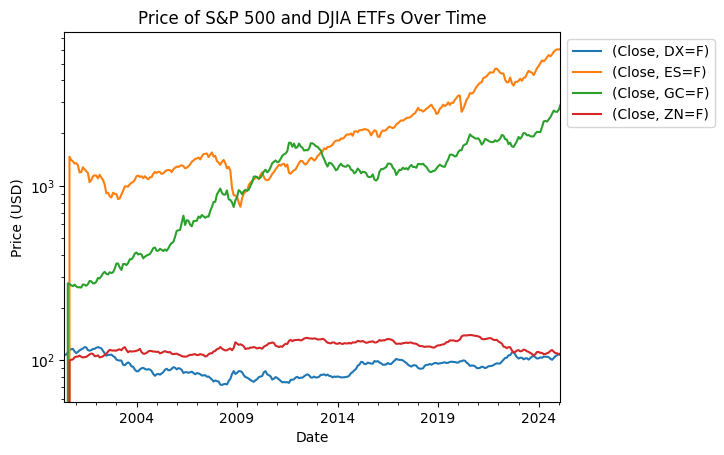

In [29]:
prices.plot()

# Additional customization
plt.yscale("log")  # If you want a logarithmic scale
plt.xlabel('Date')  # x-axis label
plt.ylabel('Price (USD)')  # y-axis label
plt.title('Price of S&P 500 and DJIA ETFs Over Time')  # Title of the plot

# Adjust legend position outside the plaot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

# Show the plot
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


### 2. Calculate Percentage Change

In [30]:
returns = prices.pct_change() 

In [31]:
returns.head()

Price          Close                              
Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2000-06-30       NaN       NaN       NaN       NaN
2000-07-31  0.008117       NaN       NaN       NaN
2000-08-31  0.027737       NaN       inf       NaN
2000-09-30  0.027819       inf -0.009815       inf
2000-10-31  0.015438 -0.040731 -0.013098  0.007835

In [32]:
#replace inf with nans
returns.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN

In [33]:
returns.head(10)

Price          Close                              
Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2000-06-30       NaN       NaN       NaN       NaN
2000-07-31  0.008117       NaN       NaN       NaN
2000-08-31  0.027737       NaN       NaN       NaN
2000-09-30  0.027819       NaN -0.009815       NaN
2000-10-31  0.015438 -0.040731 -0.013098  0.007835
2000-11-30  0.004298 -0.016000 -0.014581  0.003640
2000-12-31 -0.032010 -0.030510  0.021213  0.027986
2001-01-31 -0.022762  0.004579 -0.022627  0.009503
2001-02-28  0.015590 -0.025764 -0.013438  0.001736
2001-03-31  0.019623 -0.090941  0.001855  0.010894

In [34]:
returns.isna().sum()

Price  Ticker
Close  DX=F      1
       ES=F      4
       GC=F      3
       ZN=F      4
dtype: int64

### 3. Handle Missing Values

In [35]:
# Fills NaNs with 0
returns_cleaned = returns.fillna(0)  

returns_cleaned.shape

(297, 4)

In [36]:
returns_cleaned.head()

Price          Close                              
Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2000-06-30  0.000000  0.000000  0.000000  0.000000
2000-07-31  0.008117  0.000000  0.000000  0.000000
2000-08-31  0.027737  0.000000  0.000000  0.000000
2000-09-30  0.027819  0.000000 -0.009815  0.000000
2000-10-31  0.015438 -0.040731 -0.013098  0.007835

### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


### 2. Calculate Rolling Volatility

In [37]:
# Step 2: Calculate rolling volatility (e.g., 20-day rolling standard deviation)

window = 20  # Example: 20-day rolling window
rolling_volatility = returns_cleaned.rolling(window=window).std()

In [38]:
rolling_volatility.shape

(297, 4)

In [39]:
rolling_volatility.head(20)

Price          Close                              
Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2000-06-30       NaN       NaN       NaN       NaN
2000-07-31       NaN       NaN       NaN       NaN
2000-08-31       NaN       NaN       NaN       NaN
2000-09-30       NaN       NaN       NaN       NaN
2000-10-31       NaN       NaN       NaN       NaN
2000-11-30       NaN       NaN       NaN       NaN
2000-12-31       NaN       NaN       NaN       NaN
2001-01-31       NaN       NaN       NaN       NaN
2001-02-28       NaN       NaN       NaN       NaN
2001-03-31       NaN       NaN       NaN       NaN
2001-04-30       NaN       NaN       NaN       NaN
2001-05-31       NaN       NaN       NaN       NaN
2001-06-30       NaN       NaN       NaN       NaN
2001-07-31       NaN       NaN       NaN       NaN
2001-08-31       NaN       NaN       NaN       NaN
2001-09-30       NaN       NaN       NaN       NaN
2001-10-31       NaN       NaN       NaN       NaN
2001-11-30       NaN       NaN       NaN       NaN
2001-12-31       NaN       NaN       NaN       NaN
2002-01-31  0.017764  0.040776  0.019246  0.012129

In [40]:
rolling_volatility.tail()

Price          Close                              
Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2024-10-31  0.014541  0.026430  0.028383  0.015193
2024-11-30  0.015650  0.024337  0.029165  0.015658
2024-12-31  0.014972  0.023936  0.028615  0.015003
2025-01-31  0.015029  0.024172  0.028481  0.015158
2025-02-28  0.015354  0.023118  0.028587  0.015073

### Step 3. Compute inverse volatility

In [41]:
# Step 3: Compute inverse volatility (inversely proportional to volatility)
inverse_volatility = 1 / rolling_volatility

In [42]:
inverse_volatility.shape

(297, 4)

In [43]:
inverse_volatility.head(20)

Price           Close                                 
Ticker           DX=F       ES=F       GC=F       ZN=F
Date                                                  
2000-06-30        NaN        NaN        NaN        NaN
2000-07-31        NaN        NaN        NaN        NaN
2000-08-31        NaN        NaN        NaN        NaN
2000-09-30        NaN        NaN        NaN        NaN
2000-10-31        NaN        NaN        NaN        NaN
2000-11-30        NaN        NaN        NaN        NaN
2000-12-31        NaN        NaN        NaN        NaN
2001-01-31        NaN        NaN        NaN        NaN
2001-02-28        NaN        NaN        NaN        NaN
2001-03-31        NaN        NaN        NaN        NaN
2001-04-30        NaN        NaN        NaN        NaN
2001-05-31        NaN        NaN        NaN        NaN
2001-06-30        NaN        NaN        NaN        NaN
2001-07-31        NaN        NaN        NaN        NaN
2001-08-31        NaN        NaN        NaN        NaN
2001-09-30        NaN        NaN        NaN        NaN
2001-10-31        NaN        NaN        NaN        NaN
2001-11-30        NaN        NaN        NaN        NaN
2001-12-31        NaN        NaN        NaN        NaN
2002-01-31  56.293377  24.524045  51.957555  82.447268

### 4. Normalize Weights:

In [44]:
# Step 4: Normalize the weights for each time period
weights = inverse_volatility.div(inverse_volatility.sum(axis=1), axis=0)

In [45]:
weights.shape

(297, 4)

In [46]:
weights.head()

Price      Close               
Ticker      DX=F ES=F GC=F ZN=F
Date                           
2000-06-30   NaN  NaN  NaN  NaN
2000-07-31   NaN  NaN  NaN  NaN
2000-08-31   NaN  NaN  NaN  NaN
2000-09-30   NaN  NaN  NaN  NaN
2000-10-31   NaN  NaN  NaN  NaN

### 5. Shift Weights for Practical Application

In [47]:
# Step 5: Shift weights by one period to avoid look-ahead bias
weights = weights.shift(1)

In [48]:
weights.isna().sum()

Price  Ticker
Close  DX=F      20
       ES=F      20
       GC=F      20
       ZN=F      20
dtype: int64

In [49]:
# Drop the NaN values that appear due to the shift
weights = weights.dropna()

In [50]:
weights.shape

(277, 4)

In [51]:
weights.head()

Price          Close                              
Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2002-02-28  0.261559  0.113948  0.241413  0.383080
2002-03-31  0.271446  0.117397  0.216225  0.394933
2002-04-30  0.284271  0.118278  0.228567  0.368884
2002-05-31  0.294301  0.117292  0.220137  0.368270
2002-06-30  0.291187  0.119416  0.217314  0.372082

In [52]:
weights.tail()

Price          Close                              
Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2024-10-31  0.341933  0.179533  0.160961  0.317572
2024-11-30  0.331169  0.182202  0.169664  0.316966
2024-12-31  0.314558  0.202271  0.168789  0.314383
2025-01-31  0.317804  0.198781  0.166280  0.317135
2025-02-28  0.318374  0.197949  0.168001  0.315676

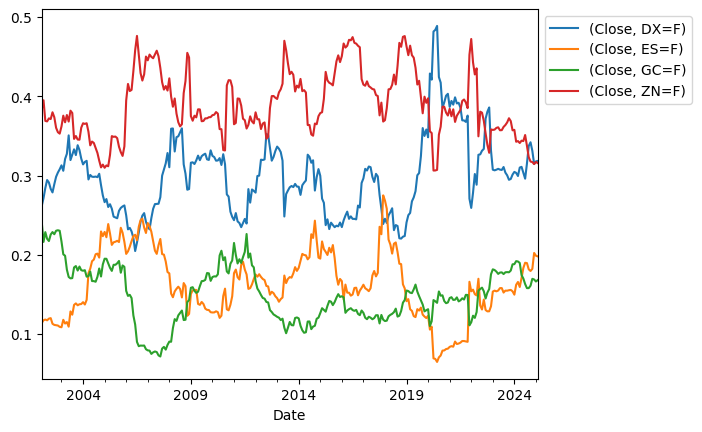

In [53]:
weights.plot()
# Adjust legend position outside the plaot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


### 2. Apply Weights to Returns

In [54]:
risk_parity_weights = weights.copy()

In [55]:
# Step 2: Apply Weights to Returns
# Multiply returns by corresponding risk-parity weights to get weighted returns
weighted_returns = risk_parity_weights * returns

### 3. Handle Missing Data

In [56]:
# Step 2: Handle Missing Data
# Drop rows with NaN values that might result from the multiplication
weighted_returns.dropna(inplace=True)

### 4. Aggregate Weighted Returns

In [57]:
# Step 3: Aggregate Weighted Returns to Get Portfolio Return
# Sum the weighted returns across all assets (columns)
risk_parity_portfolio_returns = weighted_returns.sum(axis=1)

In [58]:
risk_parity_portfolio_returns.shape

(277,)

In [59]:
risk_parity_portfolio_returns.head()

Date
2002-02-28    0.014152
2002-03-31   -0.008197
2002-04-30    0.001776
2002-05-31   -0.000518
2002-06-30   -0.005274
Freq: M, dtype: float64

### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [60]:
# 1. Annual Mean Return
annual_mean_return = risk_parity_portfolio_returns.mean() * 252  # Assuming 252 trading days in a year

# 2. Annual Volatility (Standard Deviation)
annual_volatility = risk_parity_portfolio_returns.std() * np.sqrt(252)  # Annualize by multiplying with sqrt of trading days

# 3. Skewness and Kurtosis
skewness = risk_parity_portfolio_returns.skew()
kurtosis = risk_parity_portfolio_returns.kurtosis()

# 4. Drawdown and Maximum Drawdown
cumulative_returns = (1 + risk_parity_portfolio_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

# 5. Sharpe Ratio
sharpe_ratio = annual_mean_return / annual_volatility

# 6. Sortino Ratio
downside_returns = risk_parity_portfolio_returns[risk_parity_portfolio_returns < 0]
downside_std = downside_returns.std()
sortino_ratio = annual_mean_return / downside_std

# 7. Calmar Ratio
calmar_ratio = annual_mean_return / abs(max_drawdown)

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")


Mean Annual Return: 0.6562
Annual Volatility: 0.1384
Skewness: -0.0661
Kurtosis: 1.0520
Maximum Drawdown: -0.0579
Sharpe Ratio: 4.7430
Sortino Ratio: 119.6292
Calmar Ratio: 11.3411


### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


In [61]:
# 1. Annual Mean Return
annual_mean_return = risk_parity_portfolio_returns.mean() * 252  # Assuming 252 trading days in a year

# 2. Annual Volatility (Standard Deviation)
annual_volatility = risk_parity_portfolio_returns.std() * np.sqrt(252)  # Annualize by multiplying with sqrt of trading days

# 3. Skewness and Kurtosis
skewness = risk_parity_portfolio_returns.skew()
kurtosis = risk_parity_portfolio_returns.kurtosis()

# 4. Drawdown and Maximum Drawdown
cumulative_returns = (1 + risk_parity_portfolio_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

# 5. Sharpe Ratio
sharpe_ratio = annual_mean_return / annual_volatility

# 6. Sortino Ratio
downside_returns = risk_parity_portfolio_returns[risk_parity_portfolio_returns < 0]
downside_std = downside_returns.std()
sortino_ratio = annual_mean_return / downside_std

# 7. Calmar Ratio
calmar_ratio = annual_mean_return / abs(max_drawdown)

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")


Mean Annual Return: 0.6562
Annual Volatility: 0.1384
Skewness: -0.0661
Kurtosis: 1.0520
Maximum Drawdown: -0.0579
Sharpe Ratio: 4.7430
Sortino Ratio: 119.6292
Calmar Ratio: 11.3411


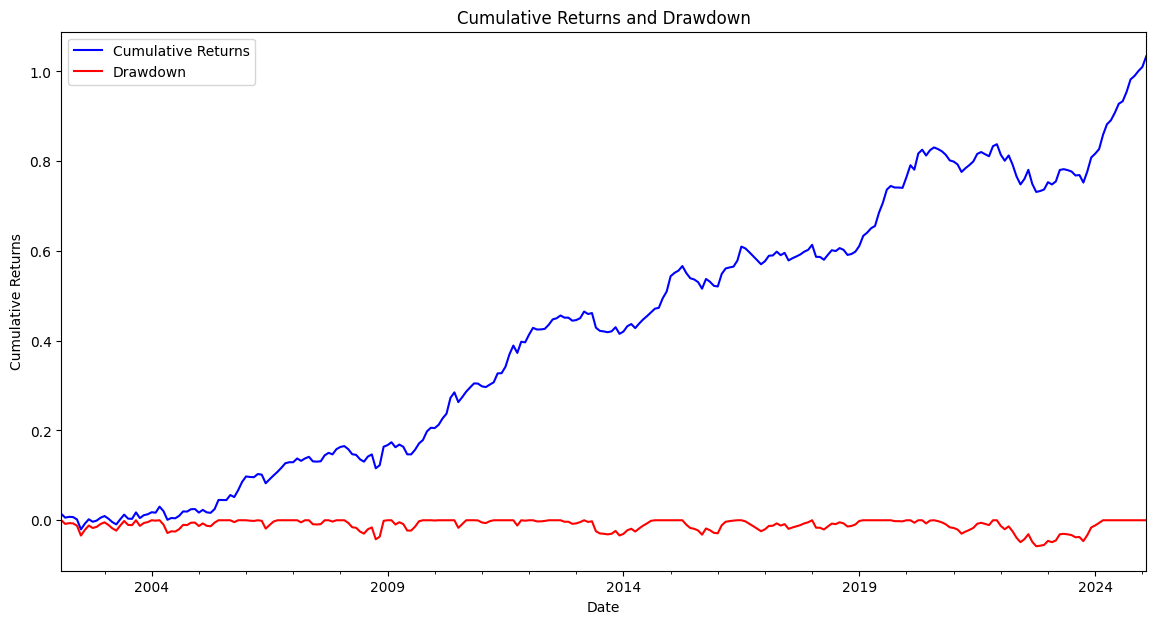

In [62]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
drawdown.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()

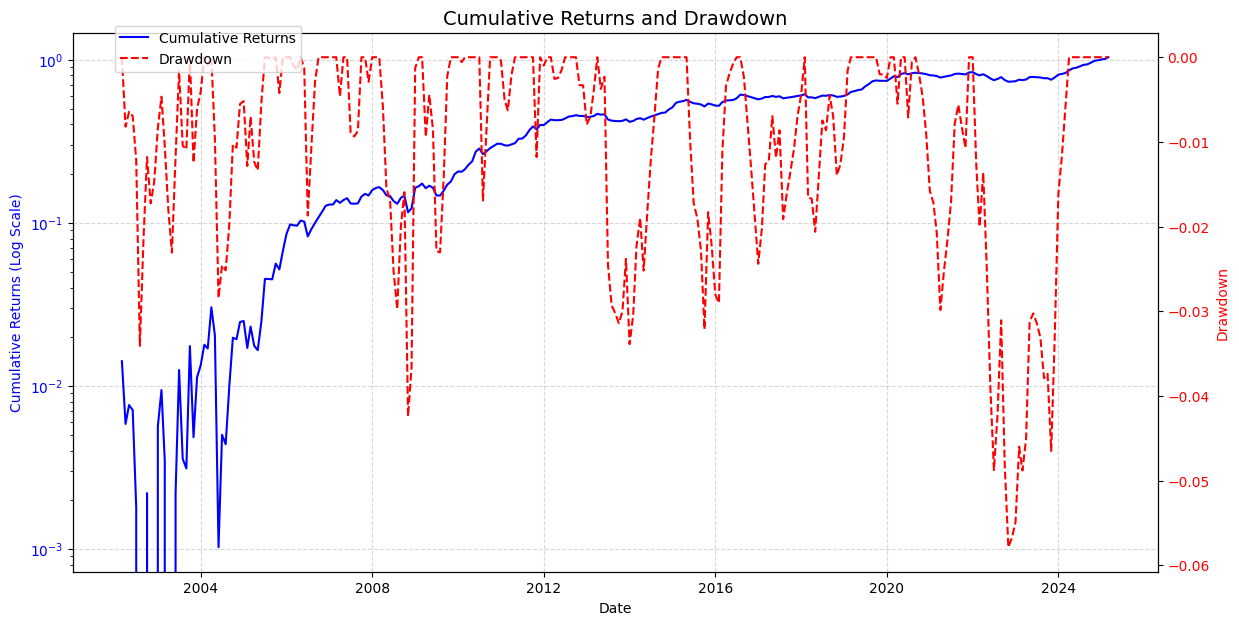

In [63]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot cumulative returns with a log scale
ax1.plot(cumulative_returns.index, cumulative_returns - 1, label='Cumulative Returns', color='blue')
ax1.set_yscale('log')  # Apply log scale
ax1.set_ylabel('Cumulative Returns (Log Scale)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for drawdown (linear scale)
ax2 = ax1.twinx()
ax2.plot(drawdown.index, drawdown, label='Drawdown', color='red', linestyle='dashed')
ax2.set_ylabel('Drawdown', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and labels
ax1.set_title('Cumulative Returns and Drawdown', fontsize=14)
ax1.set_xlabel('Date')

# Grid for better readability
ax1.grid(True, linestyle='--', alpha=0.5)

# Combine legends from both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.9))

# Show plot
plt.show()
